The Analysis is divided into 4 main parts:
1. Data understanding
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis
4. Recommendations/Conclusions

## Importring Necessary Libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  1. Read Data

### There are two datasets on which the analysis has to be carried out and are
1. application_data
2. previous_application

In this file Previous Application data will be analysed.
2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [141]:
previous_application = pd.read_csv("C:\\Users\\Maheshwar\\Desktop\\IIT-B\\Case Study\\previous_application.csv")
print(previous_application.head(5))

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans      1730.43         17145.00   
1     2802425      108129         Cash loans     25188.62        607500.00   
2     2523466      122040         Cash loans     15060.74        112500.00   
3     2819243      176158         Cash loans     47041.33        450000.00   
4     1784265      202054         Cash loans     31924.40        337500.00   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0    17145.00              0.00         17145.00                   SATURDAY   
1   679671.00               nan        607500.00                   THURSDAY   
2   136444.50               nan        112500.00                    TUESDAY   
3   470790.00               nan        450000.00                     MONDAY   
4   404055.00               nan        337500.00                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

## Data Understanding

In [142]:
print(previous_application.tail(5))
print(previous_application.shape)
print(previous_application.info())
print(previous_application.describe())

         SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1670209     2300464      352015     Consumer loans     14704.29   
1670210     2357031      334635     Consumer loans      6622.02   
1670211     2659632      249544     Consumer loans     11520.85   
1670212     2785582      400317         Cash loans     18821.52   
1670213     2418762      261212         Cash loans     16431.30   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1670209        267295.50   311400.00              0.00        267295.50   
1670210         87750.00    64291.50          29250.00         87750.00   
1670211        105237.00   102523.50          10525.50        105237.00   
1670212        180000.00   191880.00               nan        180000.00   
1670213        360000.00   360000.00               nan        360000.00   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  ...  \
1670209                  WEDNESDAY                       12  ...   
1670210   

## Validating all the Column Names 

In [143]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# 2. Data Cleaning

### Finding Duplicates

In [144]:
print(previous_application.duplicated().sum())

0


### Check the datatypes of all columns

In [145]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

### Missing Values Percentage

In [146]:
# summarising number of missing values in each column
print(previous_application.isnull().sum())

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [147]:
# Percentage of null values in all columns
null_percentage = round(previous_application.isnull().sum() / len(previous_application.index) * 100, 2)
print(null_percentage)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
RATE_INTEREST_PRIMARY         99.64
RATE_INTEREST_PRIVILEGED      99.64
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

### You can see that there are  columns having 99% missing values, some have 53%,40%etc.The colum with 53% of null values is taken into consideration as it has some amount of useful data which can be used for analysis.

### Remove all the columns which have 90 % or more than 90 % null values

In [148]:
prev_app_loan = pd.DataFrame(previous_application.loc[:, (null_percentage < 90.00)])
print(round(prev_app_loan.isnull().sum() / len(prev_app_loan.index) * 100, 2))
prev_app_loan.shape

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                   22.29
NAME_YIELD_GROUP            

(1670214, 35)

### Check the missing values in each Column against the Total and Percentage

In [149]:
def missing(data):
    miss = data.isnull().sum().sort_values(ascending = False)
    perc = 100*(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    return pd.concat([miss, perc], axis = 1, keys = ['Total', 'Percent'])

In [150]:
missing(prev_app_loan)

,Total,Percent
RATE_DOWN_PAYMENT,895844,53.64
AMT_DOWN_PAYMENT,895844,53.64
NAME_TYPE_SUITE,820405,49.12
NFLAG_INSURED_ON_APPROVAL,673065,40.30
DAYS_LAST_DUE,673065,40.30
DAYS_LAST_DUE_1ST_VERSION,673065,40.30
DAYS_FIRST_DUE,673065,40.30
DAYS_FIRST_DRAWING,673065,40.30
DAYS_TERMINATION,673065,40.30
AMT_GOODS_PRICE,385515,23.08


### Imputing Missing Values

#### Generic Function to calculate the Mean and Median,given the columns of the dataframe

In [151]:
def describe_prev_app_loan(columns):
    """ 
    Function outputs the mean and median values. 
  
  
    Parameters: 
    columns: List of columns in the dataframe for which the mean and median has to be calculated. 
  
    Returns: 
    mean,median : Returns the calculated mean and median values on the columns specified.
  
    """
    for column in columns:
        print('{column} mean value={mean}, median value={median} , value count={count}'.format(column=column, mean=round(prev_app_loan[column].mean(),2), median=prev_app_loan[column].median(), count=prev_app_loan[column].value_counts()))

In [152]:
describe_prev_app_loan(['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'RATE_DOWN_PAYMENT', 'CNT_PAYMENT','AMT_CREDIT'])

AMT_GOODS_PRICE mean value=227847.28, median value=112320.0 , value count=45000.00      47831
225000.00     43549
135000.00     40666
450000.00     38926
90000.00      29367
180000.00     24736
270000.00     20567
675000.00     20235
67500.00      16857
900000.00     15572
112500.00     14373
315000.00     11920
229500.00     10756
337500.00     10537
360000.00     10286
157500.00     10220
1350000.00     8434
202500.00      7937
247500.00      7161
454500.00      7039
1129500.00     6928
0.00           6869
540000.00      6842
1125000.00     6390
405000.00      5872
765000.00      5124
585000.00      4770
292500.00      3787
495000.00      3749
810000.00      3487
              ...  
138388.73         1
139113.90         1
355140.00         1
113386.68         1
88903.98          1
45118.35          1
355729.50         1
79112.25          1
355873.50         1
127304.77         1
355855.50         1
61114.14          1
37941.71          1
355783.50         1
138285.90         1
114006

## Deep Look into Numerial Columns

In [153]:
prev_app_loan_num = prev_app_loan.select_dtypes(include=np.number)
prev_app_loan_num.head(5)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1730.43,17145.00,17145.00,0.00,17145.00,15,1,0.00,-73,35,12.00,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,25188.62,607500.00,679671.00,nan,607500.00,11,1,nan,-164,-1,36.00,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,15060.74,112500.00,136444.50,nan,112500.00,11,1,nan,-301,-1,12.00,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,47041.33,450000.00,470790.00,nan,450000.00,7,1,nan,-512,-1,12.00,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,31924.40,337500.00,404055.00,nan,337500.00,9,1,nan,-781,-1,24.00,nan,nan,nan,nan,nan,nan


## Deep Look into Categorical Data

In [154]:
prev_app_loan_cat = prev_app_loan.select_dtypes(include='object')
prev_app_loan_cat.head(5)

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


### Checking for Column Anamolies

#### when observed DAYS_DECISION  have negative values and has to be treated as there are chances of these columns resulting anamoly.

### DAYS_DECISION

In [155]:
(prev_app_loan['DAYS_DECISION']).describe()

count   1670214.00
mean       -880.68
std         779.10
min       -2922.00
25%       -1300.00
50%        -581.00
75%        -280.00
max          -1.00
Name: DAYS_DECISION, dtype: float64

In [156]:
(prev_app_loan['DAYS_DECISION'] / -365).describe()

count   1670214.00
mean          2.41
std           2.13
min           0.00
25%           0.77
50%           1.59
75%           3.56
max           8.01
Name: DAYS_DECISION, dtype: float64

 ### So the maximum time for decision on previous application was made within 8 days.

### Having Standardized way in displaying the decimal columns 

#### For all decimal valued column lets round off the decimals  values to 2 making columns look uniformly

In [157]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)
prev_app_loan.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


## Outlier Detection


#### Extreme Value Analysis is the outlier method used for outlier detection.Columns considered are:
1. AMT_APPLICATION
2. AMT_CREDIT
3. AMT_ANNUITY

####  Outlier Analysis on AMT_APPLICATION 

In [158]:
IQR = prev_app_loan.AMT_APPLICATION.quantile(0.75) - prev_app_loan.AMT_APPLICATION.quantile(0.25)
upper_limit = prev_app_loan.AMT_APPLICATION.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = prev_app_loan.AMT_APPLICATION.quantile(0.75) + (IQR * 3)
upper_limit, upper_limit_extreme

(422820.0, 665280.0)

#### Now, let’s see the ratio of data points above the upper limit & extreme upper limit. ie, the outliers.

In [159]:
total = np.float(prev_app_loan.shape[0])
print('Total borrowers: {}'.format(prev_app_loan.AMT_APPLICATION.shape[0]/total))
print('Borrowers that earn > 422820: {}'.format(prev_app_loan[prev_app_loan.AMT_APPLICATION>422820].shape[0]/total))
print('Borrowers that earn > 665280: {}'.format(prev_app_loan[prev_app_loan.AMT_APPLICATION>665280.0].shape[0]/total))

Total borrowers: 1.0
Borrowers that earn > 422820: 0.1245463156218305
Borrowers that earn > 665280: 0.0722925325736702


#### We can see that about 12% of the data is above the upper limit and 7% of the data  is above the extreme upper limit.

####  Outlier Analysis on AMT_CREDIT

In [160]:
IQR = prev_app_loan.AMT_CREDIT.quantile(0.75) - prev_app_loan.AMT_CREDIT.quantile(0.25)
upper_limit = prev_app_loan.AMT_CREDIT.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = prev_app_loan.AMT_CREDIT.quantile(0.75) + (IQR * 3)
upper_limit, upper_limit_extreme

(504805.5, 793192.5)

#### Now, let’s see the ratio of data points above the upper limit & extreme upper limit. ie, the outliers.

In [161]:
total = np.float(prev_app_loan.shape[0])
print('Total borrowers: {}'.format(prev_app_loan.AMT_CREDIT.shape[0]/total))
print('Credits taken > 504805.5: {}'.format(prev_app_loan[prev_app_loan.AMT_CREDIT>504805.5].shape[0]/total))
print('Credits taken > 793192.5: {}'.format(prev_app_loan[prev_app_loan.AMT_CREDIT>793192.5].shape[0]/total))

Total borrowers: 1.0
Credits taken > 504805.5: 0.10776403502784673
Credits taken > 793192.5: 0.05730403409383468


#### We can see that about 11% of the data is above the upper limit and 5% of the data above the extreme upper limit.

####  Outlier Analysis on AMT_ANNUITY

In [162]:
IQR = prev_app_loan.AMT_ANNUITY.quantile(0.75) - prev_app_loan.AMT_ANNUITY.quantile(0.25)
upper_limit = prev_app_loan.AMT_ANNUITY.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = prev_app_loan.AMT_ANNUITY.quantile(0.75) + (IQR * 3)
upper_limit, upper_limit_extreme

(42163.38, 63668.34)

In [163]:
#### Now, let’s see the ratio of data points above the upper limit & extreme upper limit. ie, the outliers.

In [164]:
total = np.float(prev_app_loan.shape[0])
print('Total borrowers: {}'.format(prev_app_loan.AMT_ANNUITY.shape[0]/total))
print('Loan annuity > 42163.38: {}'.format(prev_app_loan[prev_app_loan.AMT_ANNUITY>42163.38].shape[0]/total))
print('Loan annuity > 63668.34: {}'.format(prev_app_loan[prev_app_loan.AMT_ANNUITY>63668.34].shape[0]/total))

Total borrowers: 1.0
Loan annuity > 42163.38: 0.04955173408916462
Loan annuity > 63668.34: 0.011240475771368219


#### We can see that about 5% of the data is above the upper limit and 1% of the data above the extreme upper limit.

## Outlier Treatment

#### Most trivial yet effective method of outlier treatment is done by implementing top coding, the outlier is capped at a certain maximum value and looks like many other observations

#### Top Coding of 
1. AMT_APPLICATION
2. AMT_CREDIT
3. AMT_ANNUITY

In [165]:
print('Application Amount > 665280.34 : {}'.format(prev_app_loan[prev_app_loan.AMT_APPLICATION>665280].shape[0]))
print('Percentage of outliers: {}'.format(prev_app_loan[prev_app_loan['AMT_APPLICATION']>665280].shape[0]/np.float(prev_app_loan.shape[0])))
prev_app_loan.loc[prev_app_loan.AMT_APPLICATION>665280,'AMT_APPLICATION'] = 665280
prev_app_loan.AMT_APPLICATION.max()

Application Amount > 665280.34 : 120744
Percentage of outliers: 0.0722925325736702


665280.0

Around 7% of data is exceeding the upper extreme limit of outliers.

In [166]:
print('Credit Amount > 793192.5: {}'.format(prev_app_loan[prev_app_loan['AMT_CREDIT']>793192.5].shape[0]))
print('Percentage of outliers: {}'.format(prev_app_loan[prev_app_loan['AMT_CREDIT']>793192.5].shape[0]/np.float(prev_app_loan.shape[0])))
prev_app_loan.loc[prev_app_loan.AMT_CREDIT>793192.5,'AMT_CREDIT'] = 793192.5
prev_app_loan.AMT_CREDIT.max()

Credit Amount > 793192.5: 95710
Percentage of outliers: 0.05730403409383468


793192.5

Around 5% of data is exceeding the upper extreme limit of outliers.

In [167]:
print('Loan Annuity > 63668.34: {}'.format(prev_app_loan[prev_app_loan['AMT_ANNUITY']>63668.34].shape[0]))
print('Percentage of outliers: {}'.format(prev_app_loan[prev_app_loan['AMT_ANNUITY']>63668.34].shape[0]/np.float(prev_app_loan.shape[0])))
prev_app_loan.loc[prev_app_loan.AMT_ANNUITY>63668.34,'AMT_ANNUITY'] = 63668.34
prev_app_loan.AMT_ANNUITY.max()

Loan Annuity > 63668.34: 18774
Percentage of outliers: 0.011240475771368219


63668.34

Around 1% of data is exceeding the upper extreme limit of outliers.

#### Since the percentage of outliers crossing the upper extreme limit are 7%, 5% and 1% respectively.Using Top Coding technique the outliers are removed and the data is effectively clean for further analysis and also  the maximum value will be displayed will be equal to the upper_limit_extreme values in their respective columns.

## Outlier Analysis

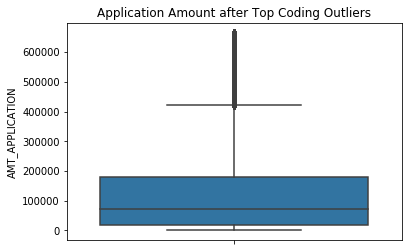

In [168]:
sns.boxplot(y='AMT_APPLICATION', data = prev_app_loan)
plt.title("Application Amount after Top Coding Outliers")
plt.show()

#### No points in the dataset lies "two far away" from the whiskers.

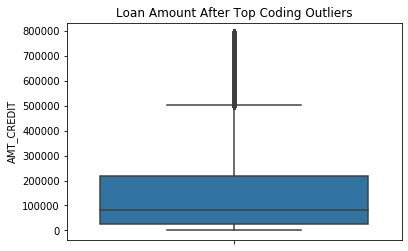

In [169]:
sns.boxplot(y='AMT_CREDIT', data = prev_app_loan)
plt.title("Loan Amount After Top Coding Outliers")
plt.show()

#### No points in the dataset lies "two far away" from the whiskers.

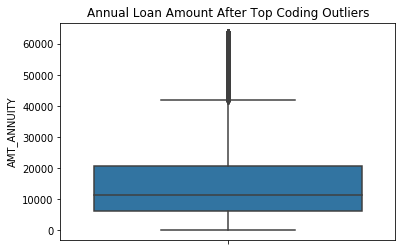

In [170]:
sns.boxplot(y='AMT_ANNUITY', data = prev_app_loan)
plt.title("Annual Loan Amount After Top Coding Outliers")
plt.show()

#### No points in the dataset lies "two far away" from the whiskers.

## Binning Of Continuous Variables

### Create bins for range of Loan Annuity

In [171]:
bins = [0, 15000, 30000, 45000, 60000, 75000,90000]
slot = ['0-15000', '15000-30000', '30000-45000', '45000-60000', '60000-75000','75000 and above']
prev_app_loan['AMT_ANNUITY_RANGE'] = pd.cut(prev_app_loan['AMT_ANNUITY'], bins, labels=slot)

### Create bins for range of   Application Amount

In [172]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 1200000]
slot = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','100000 and above']
prev_app_loan['AMT_APPLICATION_RANGE'] = pd.cut(prev_app_loan['AMT_APPLICATION'], bins, labels=slot)

# Analysis

### Choose the columns to perform analysis and draw conclusion based on the values obtained after performing Analusis on these columns

In [173]:
prev_app_loan = prev_app_loan[['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','FLAG_LAST_APPL_PER_CONTRACT','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','CHANNEL_TYPE','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CONTRACT_STATUS','AMT_DOWN_PAYMENT']]

## Examine the distribution of NAME_CONTRACT_STATUS Column

The target is what we are asked to predict has 4 values 
1. Approved
2. Cancelled
3. Refused
4. Unused
Let's find out the how each columns vary with NAME_CONTRACT_STATUS.

In [174]:
prev_app_loan['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

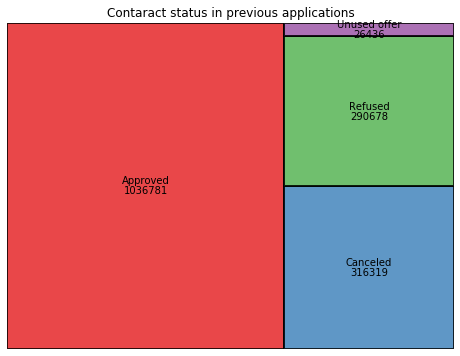

In [175]:
cnts = prev_app_loan["NAME_CONTRACT_STATUS"].value_counts()
import squarify
plt.figure(figsize=(8,6))
squarify.plot(cnts.values,label=cnts.keys(),value=cnts.values,linewidth=2,edgecolor="k",alpha=.8,color=sns.color_palette("Set1"))
plt.axis("off")
plt.title("Contaract status in previous applications")
plt.show()

From the above graph it is clear that,
1. There are 1036781 Approved application.
2. There are 316319 Canceled  application.       
3. There are 290678 Refused application.
4. There are 26436  Unused offer.

# Univariate Analysis

## Continuous Variables

####  In case of continuous variables, we need to understand the central tendency and spread of the variable.These are measured using various statistical metrics visualization methods such as Boxplot,Histogram/Distribution Plot, Violin Plot etc.

## Categorical Variables

#### For categorical variables, we’ll use frequency table to understand distribution of each category. It can be be measured using two metrics, Count and Count% against each category. Countplot or Bar chart can be used as visualization.

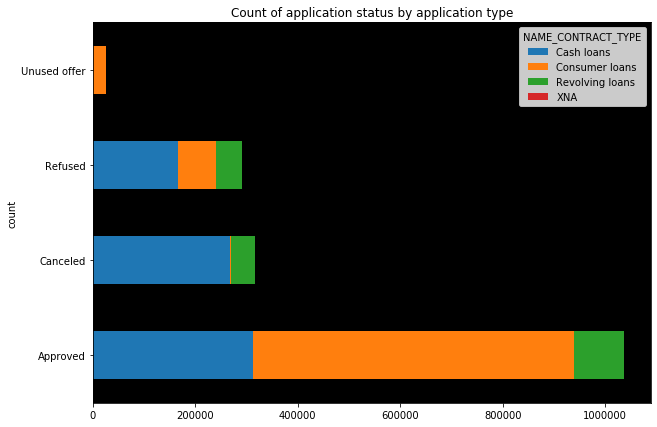

In [176]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["NAME_CONTRACT_TYPE"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

1. Consumer loans Clients = 729151
2. Approved = 626470(85.91%), Canceled = 1559(0.21%), Refused = 75185(10.31%), Unused Offer = 25937(3.55%)
3. Cash Loans Clients = 747553
4. Approved = 312540(41.80%), Canceled = 268591(35.92%), Refused = 165928(22.19%), Unused offer = 494(0.066%)
5. Revolving Loans Clients = 193164
6. Approved = 97771(50.61%), Canceled = 45854(23.73), Refused = 49534(25.64%), Unused Offer = 5(0.0025%)
7. 35.92% Cash loans are canceled as compare to other loans. More Cash loans have been refused by the bank as compare to others.
8. Unused offer is more or less is same in all categories of loans.
9. Consumer loans are more approved by the banks as compared to others loans

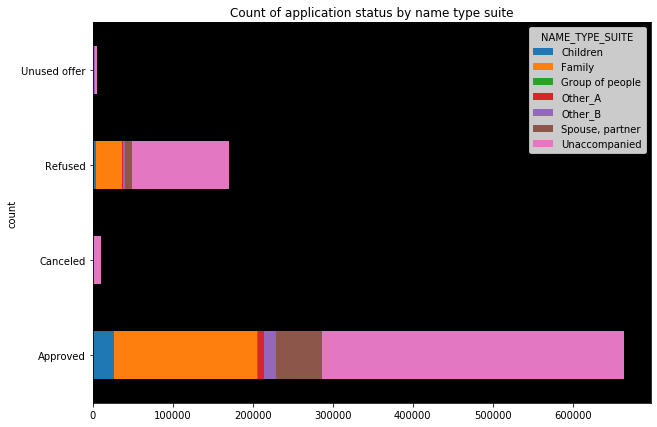

In [177]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["NAME_TYPE_SUITE"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by name type suite")
ax.set_facecolor("k")

From the above grph it is clear that,
1. Unaccompanied = 508970
2. Approved = 377800(74.22%), Canceled = 8463(1.66%), Refused = 120141(23.60%), Unused Offer = 2566(0.5%)
3. Family = 213263
4. Approved = 178340(83.48%), Canceled = 1200(0.56%), Refused = 32039(15.02%), Unused offer = 1684(0.78%)
5. Children = 27565
6. Approved = 27079(98.23%), Canceled = 81(0.29%), Refused = 22(0.079%), Unused Offer = 383(1.38%)
Those clients having Children have high percentage of loan approval and least percent of loan refusal.<br> 
Clients are not cancelling the loan,  those having family.<br> 
Unaccompanied clients loans have been refused by the banks which is the most i.e. 23%.<br> 

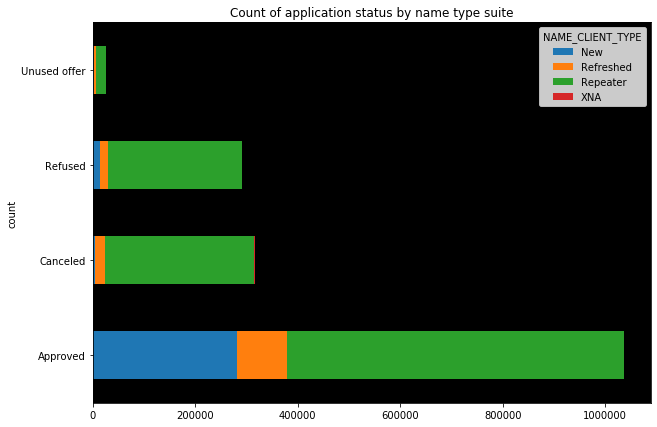

In [178]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["NAME_CLIENT_TYPE"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by name type suite")
ax.set_facecolor("k")

1. Repeater = 1231261
2. Approved = 657844(53.42%), Canceled = 292232(23.73%), Refused = 260860(21.1%), Unused Offer = 20325(1.65%)
3. New = 301363
4. Approved = 281259(93.32%), Canceled = 3548(1.17%), Refused = 14431(4.7%), Unused offer = 2125(0.70%)
5. New client's loan approval percentage is much higher than Repeater client.
6. Cancellation of loan in repeater's client is very high.

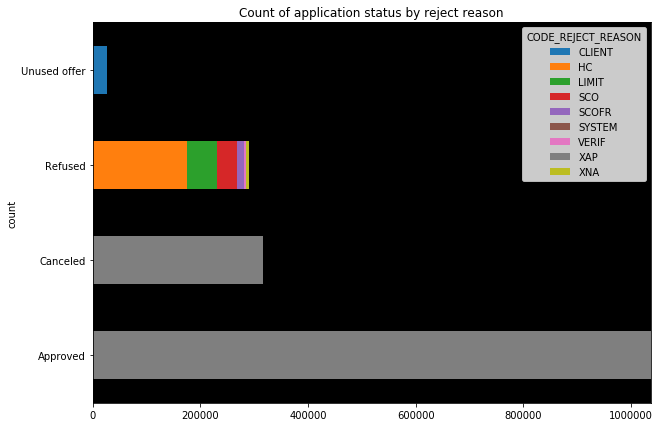

In [179]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["CODE_REJECT_REASON"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by reject reason")
ax.set_facecolor("k")

1.XNA & XNP are null values
2. For refused,Refused HC = 175231, Limit = 55680, SCO = 37467 has these values indicating that the application was rejected on the codes HC,Limit and SCO.

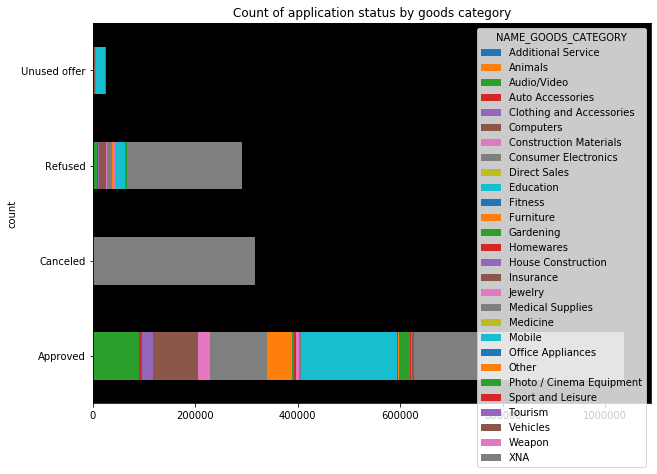

In [180]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["NAME_GOODS_CATEGORY"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by goods category")
ax.set_facecolor("k")

From the above grph it is clear that,
1. Mobile industry is highest loan obtainer.
2. Photo/Cinema , Computers , Others , Vehicles , tourism are some of the category on which clients have applied for loan and has been approved too.

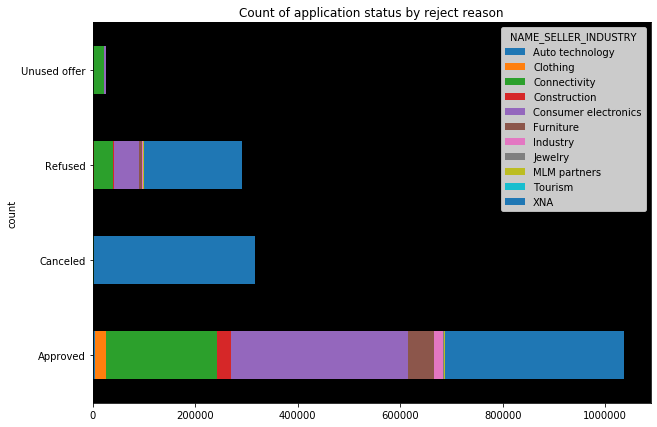

In [181]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["NAME_SELLER_INDUSTRY"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by reject reason")
ax.set_facecolor("k")

From the above graph it is clear that,
1. Auto technology = 4990
2. Approved = 4515(90.48%), Cancelled = 2(0.04%), Refused =  468(9.37%), Unused Offer = 5(0.10%)
3. Consumer electronics = 398265
4. Approved = 345194(86.67%), Cancelled = 248(0.06%), Refused = 49510(12.43%), Unused offer = 3313(0.83%)
5. Connectivity = 276029
6. Approved = 216284(78.35%), Cancelled = 1650(0.59%), Refused = 35902(13%), Unused offer = 22193(8.04%)
7. Loan approval rate is high for Auto technology as compared to others.
8. Loan rejection rate is low for Auto technology. 
9. Unused offer percent is higher in Connectivity i.e. 8%

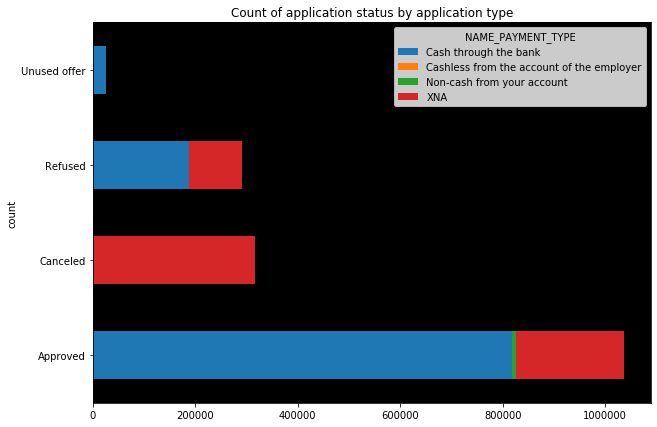

In [182]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["NAME_PAYMENT_TYPE"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

From the above graph it is clear that,
1. Cash through the bank = 1033552
2. Approved = 817174(79.06%), Cancelled = 3190 (0.3%), Refused = 187307(18.12%), Unused offer = 25881(2.5%)
3. XNA are null values
4. Non cash from your account = 8193
5. Approved = 6938(84.68%), Cancelled = 35(0.42%), Refused = 1187(14.48%), Unused offer = 33(0.4%)
6. Refusal rate is higher in 'Cash through the bank' as compare to other
7. Approval rate is higher in 'Non-cash from your account'. 

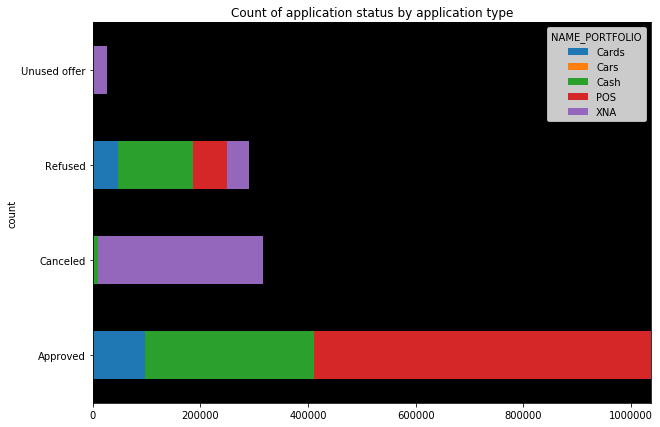

In [183]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["NAME_PORTFOLIO"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

From the above grph it is clear that,
1. Cards = 144985
2. Approved = 97771(67.43%), Cancelled = 473(0.32%), Refused = 46739(47.80%), Unused offer = 2
3. Cash = 461563
4. Approved = 312536(67.71%), Cancelled = 9823(2.12%), Refused = 139204(30.15%)
5. Refused rate is higher in those clients having cards rather than  cash

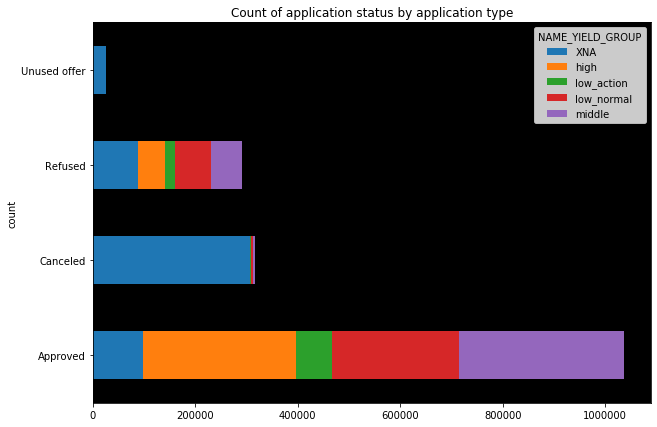

In [184]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["NAME_YIELD_GROUP"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

From the above grph it is clear that,
1. High = 353351
2. Approved = 299018(84.62%), Cancelled = 998(0.28%), Refused = 53243(15.06%), Unused offer = 92
3. Low action = 92041
4. Approved = 70876(77%), Cancelled = 961(1.04%), Refused = 20204(21.95%), Unused offer = 0
5. Low normal = 322095
6. Approved = 246076(76.39%), Cancelled = 4828(1.49%), Refused = 70538(21.89%), Unused offer = 653
7. Middle = 385532
8. Approved = 323036(83.78%), Cancelled = 3254(0.84%), Refused = 59057(15.31%), Unused offer = 185
9. Low action and Low normal interest rates have highest refusal rate as compared to others.
10. Approval rate is high in High interest rate group 
11. Unused offer is very low in all  group interest rates

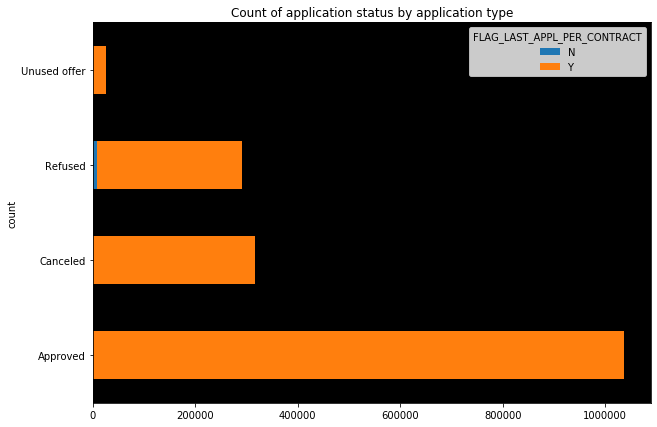

In [186]:
ax = pd.crosstab(prev_app_loan["NAME_CONTRACT_STATUS"],prev_app_loan["FLAG_LAST_APPL_PER_CONTRACT"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

From the above grph it is clear that,
1. Y = 1661739
2. Approved = 1036781, Cancelled = 316317, Refused = 282205, Unused for = 26436
3. N = 8475
4. Approved = 0, Cancelled = 2, Refused = 8473, Unused offer = 0

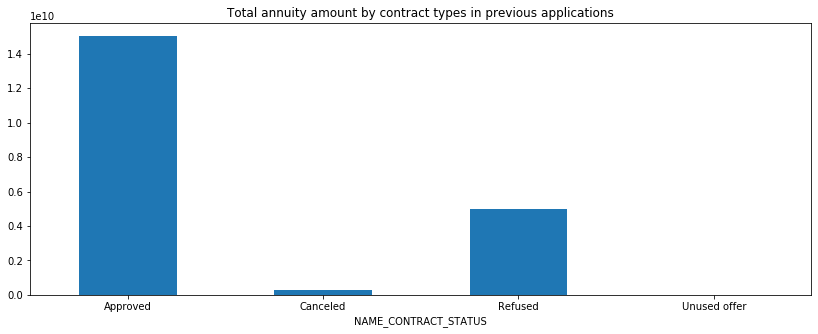

In [187]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.show()

From the above graph it is clear that,
1. Approved = 1.502e+10 (73.75%)
2. Cancelled = 3.09e+8 (1.51%)
3. Refused = 5.0e+9 (24.66%)
4. Unused offer = 9.25e+06 (0.04%)
<br>
CONCLUSIONS
High rate of approval in applications for clients who are seeking loan for amount Annuity(Client pay series of payments or lump sum payments to company and in return obtain regular disbursements beginning immediately or after some time.) <br>
Cancellation is quite low 1.51%  as annuity provides steady income during retirement.<br>
Unused offer is quite low 0.04%.<br>
 Refusal rate is low 24.66% as compared to amount goods price(32.96%) or amount credit(30%). <br>

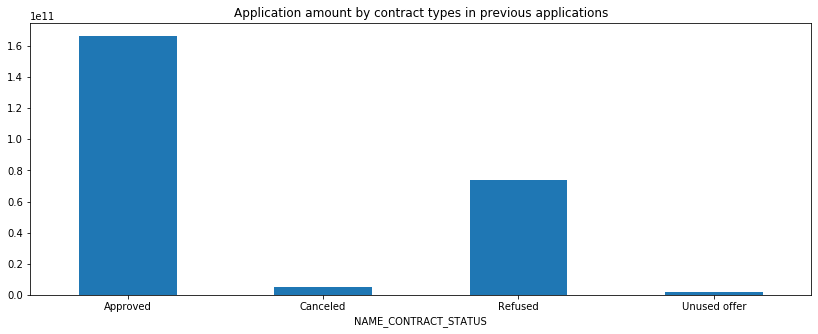

In [188]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")["AMT_APPLICATION"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Application amount by contract types in previous applications")
plt.show()

From the above grph it is clear that,
1. 1.66e+11 applications approved for the credit client asked on previous applications 
2. 5.027e+09 applications cancelled by the clients during the approval process.
3. 7.36e+10 applications refused by the banks.
4. 1.83e+09 applicants in unused offer. 
5. Cancellation of applications and unused offer is very low for Amount Application

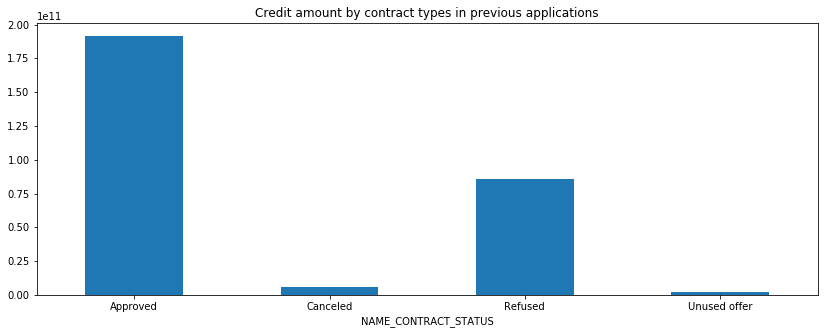

In [197]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")["AMT_CREDIT"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Credit amount by contract types in previous applications")
plt.show()

From the above grph it is clear that,
1. 1.91e+11(67.14%)  applications approved for the given credit amount
2. 5.71e+09(2.0%)  applications cancelled by the customer during approval process
3. 8.59e+10(30.19%) applications refused by the bank.
4. 1.83e+09(6.43%)  applicants for unused offer.
5. 30% applicants is refused for the credit amount and cancellation is quite low about 2%

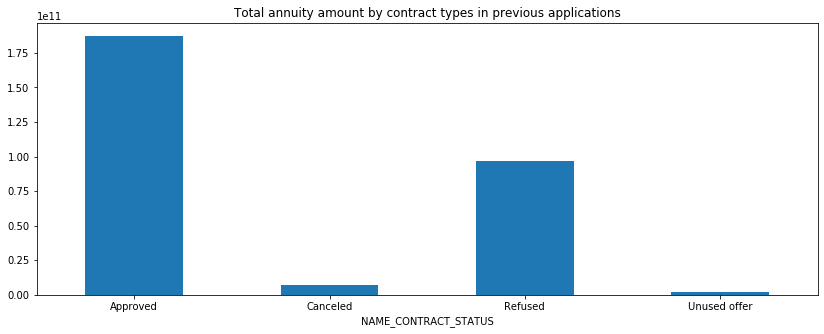

In [198]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")["AMT_GOODS_PRICE"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.show()

From the above grph it is clear that,
1. Approved = 1.87e+11 (63.94%)
2. Cancelled = 7.189e+09 (2.45%)
3. Refused = 9.64e+10 (32.96%)
4. Unused offer = 1.844e+09 (0.6%)
5. Here Unused offer is even more less. Refusal of applications is increased to 32% on amount goods price.
6. Approval of applications is 63.94%

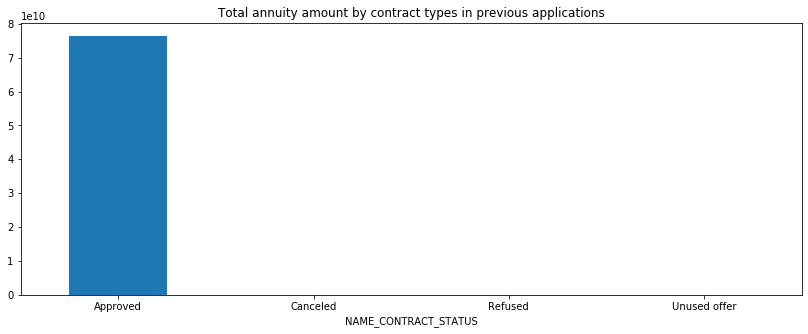

In [199]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")["DAYS_LAST_DUE"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.show()

From the above grph it is clear that,
1. DAYS_LAST_DUE is applicable only for approved contract status.
2. All the rejected application have no effect on the total amount annuity.
3. Approved = 7.63e+10.
4. Rest of the categories, Cancelled, Refused, Unused Offer are zero.

## Bivariate/Multivariate Analysis

### Bivariate/Multivariate Analysis finds out the relationship between two/two or more variables.We can perform Bivariate/Multivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous

<Figure size 1008x360 with 0 Axes>

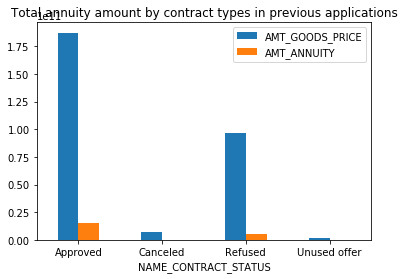

In [200]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")[["AMT_GOODS_PRICE","AMT_ANNUITY"]].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.show()

From the above grph it is clear that,
1. AMT_GOODS_PRICE approval rate is high as compared to AMT_ANNUITY 
2. Less loan approval on the AMT_ANNUITY.
3. Similarly less refusal on AMT_ANNUITY.

<Figure size 1008x360 with 0 Axes>

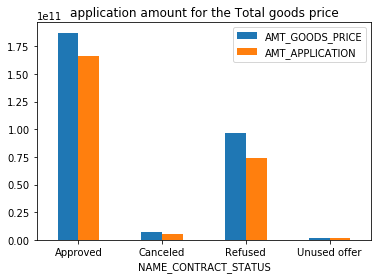

In [201]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")[["AMT_GOODS_PRICE","AMT_APPLICATION"]].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("application amount for the Total goods price")
plt.show()

From the above grph it is clear that,
1.Approval of loan on AMT_GOODS_PRICE is high as compared to credit ask by client on previous application
2.Cancelation of loan is low in both the cases.
3.More Refusal in case of loan taken on AMT_GOODS_PRICES

<Figure size 1008x360 with 0 Axes>

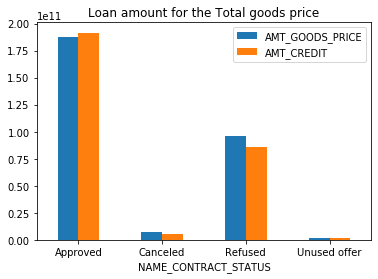

In [202]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")[["AMT_GOODS_PRICE","AMT_CREDIT"]].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Loan amount for the Total goods price")
plt.show()

From the above grph it is clear that,
1. More approval of Credit amount on Previous application as compared to AMT_GOODS_PRICES.
2. Refusal of loan is more on AMT_GOODS_PRICES
3. Cancellation is less in both the cases.

<Figure size 1008x360 with 0 Axes>

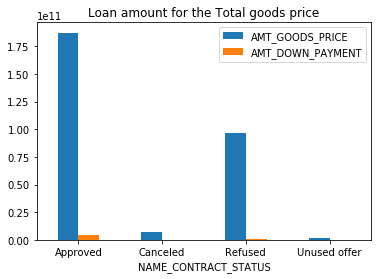

In [203]:
plt.figure(figsize=(14,5))
prev_app_loan.groupby("NAME_CONTRACT_STATUS")[["AMT_GOODS_PRICE","AMT_DOWN_PAYMENT"]].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Loan amount for the Total goods price")
plt.show()

From the above grph it is clear that,
1. Few approval of loan on down payment on previous application. 
2. High Approval of loan taken on goods price
3. No cancellation or refusal on the basis of loan on down payment

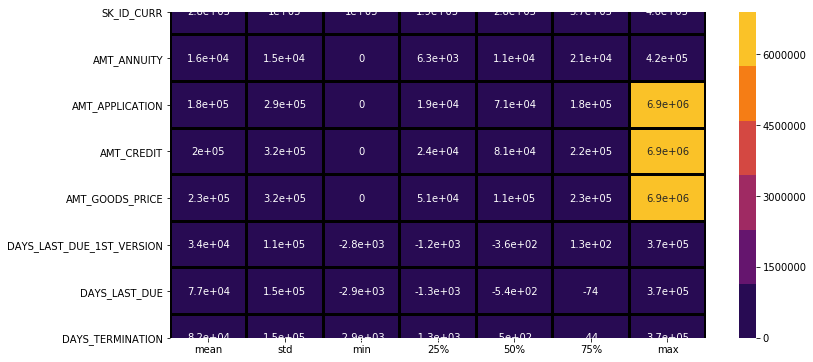

In [204]:
cols = ['SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','FLAG_LAST_APPL_PER_CONTRACT', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NAME_TYPE_SUITE','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',	'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','CHANNEL_TYPE','NAME_PAYMENT_TYPE',  'CODE_REJECT_REASON','NAME_CONTRACT_STATUS']
plt.figure(figsize=(12,6))
sns.heatmap(previous_application[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

It s observed that AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE are highly correlated compared to other columns.
Indicating these columns are interlinked.

##  4. Recommendations/Conclusions

1. The variables which help to conclude on the loan defaulters are:
2. NAME CONTACT TYPE – Cash loan clients is refusal rate is 22.19% as compare to revolving loans clients which is 25.64%.
3. NAME TYPE SUITE – Those have family, their refusal rate of loan is 15.02% which is lower than unaccompanied ones i.e. 23.60%
4. NAME PORTFOLIO – Refusal rate is higher for those applied for cards i.e. 47.30% as compare to Cash which is 30.15%.